# Proyek Analisis Data: E-Commerce Public Dataset [(Sumber)](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
- **Nama:** Nabila Alawiyah
- **Email:** nabilaalawiyah.25@gmail.com
- **ID Dicoding:** nabila_alawiyah_B1OF

## Menentukan Pertanyaan Bisnis

1. Bagaimana demografi customer yang kita miliki?
2. Apa saja produk yang paling laris dan tidak?
3. Bagaimana performa penjualan pada tiap bulannya?
4. Kategori produk mana yang paling menguntungkan?
5. Jenis pembayaran apa yang paling sering digunakan?
6. Bagaimana peta persebaran customer?

## Import Semua Packages/Library yang Digunakan

In [112]:
# Library for analysist data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.image as mpimg
import urllib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
# customer dataset
customers_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/customers_dataset.csv", delimiter=",")

# geolocation dataset
geolocation_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/geolocation_dataset.csv", delimiter=",")

# order items dataset
order_items_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/order_items_dataset.csv", delimiter=",")

# order payments dataset
order_payment_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/order_payments_dataset.csv", delimiter=",")

# order reviews dataset
order_reviews_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/order_reviews_dataset.csv", delimiter=",")

# orders dataset
orders_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/orders_dataset.csv", delimiter=",")

# product category name translation dataset
product_category_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/product_category_name_translation.csv", delimiter=",")

# products dataset
products_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/products_dataset.csv", delimiter=",")

# sellers dataset
sellers_df = pd.read_csv("/content/drive/MyDrive/Data/ecommerce/sellers_dataset.csv", delimiter=",")

In [4]:
# load data customers_df
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# load data geolocation_df
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# load data order_items_df
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# load data order_reviews_df
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
# load data orders_df
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# load data product_category_name_translation_df
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
# load data products_df
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
# load data sellers_df
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
# load data geolocation_df
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- customers_dataset → Berisi informasi tentang pelanggan
- geolocation_dataset → Berisi informasi tentang letak geografis tiap lokasi
- order_items_dataset → Detail produk dalam setiap pesanan, termasuk harga, jumlah barang yang dibeli, dan biaya pengiriman.
- order_payments_dataset → Berisi informasi pembayaran, seperti total pembayaran dan metode pembayaran.
- order_reviews_dataset → Berisi informasi tentang review produk dari pelanggan
- orders_dataset → Berisi informasi pesanan, seperti tanggal pembelian, status pesanan, dan customer ID.
- product_category_name_translation → Menerjemahkan kategori produk agar lebih mudah dianalisis.
- products_dataset → Memberikan informasi produk, seperti nama produk, kategori, dan deskripsi.
- sellers_dataset → Berisi informasi terkait penjual

### Assessing Data

1. Menilai Data

In [13]:
customers_df.info()
geolocation_df.info()
order_items_df.info()
order_payment_df.info()
order_reviews_df.info()
orders_df.info()
product_category_df.info()
products_df.info()
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

2. Memeriksa Data Duplikat

In [14]:
print("Jumlah duplikasi data pada customers_df: ", customers_df.duplicated().sum())
print("Jumlah duplikasi data pada geolocation_df: ", geolocation_df.duplicated().sum())
print("Jumlah duplikasi data pada order_items_df: ", order_items_df.duplicated().sum())
print("Jumlah duplikasi data pada order_payment_df: ", order_payment_df.duplicated().sum())
print("Jumlah duplikasi data pada order_reviews_df: ", order_reviews_df.duplicated().sum())
print("Jumlah duplikasi data pada orders_df: ", orders_df.duplicated().sum())
print("Jumlah duplikasi data pada product_category_df: ", product_category_df.duplicated().sum())
print("Jumlah duplikasi data pada products_df: ", products_df.duplicated().sum())
print("Jumlah duplikasi data pada sellers_df: ", sellers_df.duplicated().sum())

Jumlah duplikasi data pada customers_df:  0
Jumlah duplikasi data pada geolocation_df:  261831
Jumlah duplikasi data pada order_items_df:  0
Jumlah duplikasi data pada order_payment_df:  0
Jumlah duplikasi data pada order_reviews_df:  0
Jumlah duplikasi data pada orders_df:  0
Jumlah duplikasi data pada product_category_df:  0
Jumlah duplikasi data pada products_df:  0
Jumlah duplikasi data pada sellers_df:  0


3. Memeriksa data dengan missing value

In [15]:
print("Jumlah data dengan missing value pada customer_df:")
print(customers_df.isna().sum())
print("")
print("Jumlah data dengan missing value pada geolocation_df: ")
print(geolocation_df.isna().sum())
print("")
print("Jumlah data dengan missing value pada order_items_df: ")
print(order_items_df.isna().sum())
print("")
print("Jumlah data dengan missing value pada order_payment_df: ")
print(order_payment_df.isna().sum())
print("")
print("Jumlah data dengan missing value pada order_reviews_df: ")
print(order_reviews_df.isna().sum())
print("")
print("Jumlah data dengan missing value pada orders_df: ")
print(orders_df.isna().sum())
print("")
print("Jumlah data dengan missing value pada product_category_df: ")
print(product_category_df.isna().sum())
print("")
print("Jumlah data dengan missing value pada products_df: ")
print(products_df.isna().sum())
print("")
print("Jumlah data dengan missing value pada sellers_df: ")
print(sellers_df.isna().sum())

Jumlah data dengan missing value pada customer_df:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah data dengan missing value pada geolocation_df: 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah data dengan missing value pada order_items_df: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah data dengan missing value pada order_payment_df: 
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah data dengan missing value pada order_reviews_df: 
review_id                      0
order_id        

4. Menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik

In [16]:
print("Ringkasan parameter statistik dari kolom numerik pada customers_df:")
print(customers_df.describe(include="all"))
print("")
print("Ringkasan parameter statistik dari kolom numerik pada geolocation_df:")
print(geolocation_df.describe(include="all"))
print("")
print("Ringkasan parameter statistik dari kolom numerik pada order_items_df:")
print(order_items_df.describe(include="all"))
print("")
print("Ringkasan parameter statistik dari kolom numerik pada order_payment_df:")
print(order_payment_df.describe(include="all"))
print("")
print("Ringkasan parameter statistik dari kolom numerik pada order_reviews_df:")
print(order_reviews_df.describe(include="all"))
print("")
print("Ringkasan parameter statistik dari kolom numerik pada orders_df:")
print(orders_df.describe(include="all"))
print("")
print("Ringkasan parameter statistik dari kolom numerik pada products_df:")
print(products_df.describe(include="all"))
print("")
print("Ringkasan parameter statistik dari kolom numerik pada sellers_df:")
print(sellers_df.describe(include="all"))

Ringkasan parameter statistik dari kolom numerik pada customers_df:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN

**Insight:**
1. Tidak ada kesalahan data pada customer_df
2. Terdapat kesalah data pada geolocation_df, berupa:
  - Terdapat data duplikat sebanyak 261.831 data
3. Terdapat kesalah data pada order_items_df, berupa:
  - Kesalahan tipe data pada field shipping_limit_date yang seharusnya adalah datetime
4. Tidak ada kesalahan data pada order_payment_df
5. Terdapat kesalah data pada order_reviews_df, berupa:
  - Missing value sebanyak 87.656 data pada review_comment_title, dan 58.247 data pada review_comment_message.
6. Terdapat kesalahan data pada orders_df berupa:
  - Kesalahan tipe data, seharusnya datetime bukan object, pada field order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
7. Tidak ada kesalahan data pada product_category_df
8. Terdapat kesalahan data pada products_df, berupa:
  - Missing value sebanyak 610 data pada product_category_name, product_name_lenght,product_description_lenght, product_photos_qty.
  - Missing value sebanyak 2 data pada product_weight_g, product_length_cm,product_height_cm, product_width_cm
9. Tidak ada kesalahan data pada sellers_df



**Atau, dapat disimpulkan bahwa:**
1. Terdapat kesalahan tipe data pada:
  - order_items_df, pada field shipping_limit_date yang seharusnya datetime
  - orders_df, pada field order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date yang seharusnya datetime
2. Terdapat duplikasi data pada:
  - geolocation_df, sebanyak 261.831 data
3. Terdapat missing value pada:
  - order_reviews_df, sebanyak 87.656 data pada review_comment_title, dan sebanyak  58.247 data pada review_comment_message.
  - orders_df, sebanyak 160 data pada order_approved_at, sebanyak 1.783 data pada order_delivered_carrier_date, dan sebanyak 2.965 data pada order_delivered_customer_date
  - products_df, sebanyak 610 data pada:
  product_category_name, product_name_lenght, product_description_lenght, product_photos_qty. Sebanyak 2 data pada product_weight_g, product_length_cm, product_height_cm, product_width_cm.



    




### Cleaning Data

1. Memperbaiki tipe data

In [17]:
# Mengubah tipe data dari object menjadi date time
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [18]:
# Mengubah tipe data dari object menjadi date time
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",  "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [19]:
# Memeriksa kembali tipe data pada order_items_df dan orders_df
order_items_df.info()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non

2. Menangani duplikat data

In [20]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


**Insight**
- Tidak melakukan drop data pada geolocation_Df, karena berisi data tentang detail lokasi.

3. Menangani missing value

3.1. Order_reviews_df

In [21]:
order_reviews_df[order_reviews_df.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
99219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99222,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
missing_ratio = order_reviews_df['review_comment_title'].isnull().mean() * 100
print(f"Persentase missing values: {missing_ratio:.2f}%")

Persentase missing values: 88.34%


In [ ]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [23]:
missing_ratio = order_reviews_df['review_comment_message'].isnull().mean() * 100
print(f"Persentase missing values: {missing_ratio:.2f}%")

Persentase missing values: 58.70%


In [24]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


**Insight:**
- Kita asumsikan bahwa kolom review_comment_title diperbolehkan kosong, sehingga tidak perlu didrop. Karena, jumlah presentasi missing value nya sudah mencampai 88% dan 58%

3.2. orders_Df

In [25]:
orders_df[orders_df.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
1,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
2,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
3,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
4,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...
99436,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
99437,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
99438,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT
99439,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT


In [ ]:
missing_ratio = orders_df['order_approved_at'].isnull().mean() * 100
print(f"Persentase missing values: {missing_ratio:.2f}%")

Persentase missing values: 0.16%


In [26]:
orders_df = orders_df.dropna(subset=['order_approved_at'])

**Insight:**
- Karena presentasi missing value nya kuranag dari 1%, maka dapat dilakukan drop data.

3.3. products_df

In [27]:
products_df[products_df.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
missing_ratio = products_df['product_category_name'].isnull().mean() * 100
print(f"Persentase missing values: {missing_ratio:.2f}%")

Persentase missing values: 1.85%


In [29]:
missing_ratio = products_df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].isnull().mean() * 100
print(missing_ratio)

product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
dtype: float64


In [30]:
products_df = products_df.dropna(subset=['product_category_name'])

## Exploratory Data Analysis (EDA)

### Explore ...

Merge data customers_df dan orders_df untuk mengetahui demografi customers, menjadi customers_orders_df

In [31]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [32]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [33]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99281,99281,99281,99281,99281,97644,96462,99281
unique,99281,99281,7,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96464,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:10:15.359313152,2017-12-31 18:35:24.098800384,2018-01-04 22:55:51.933677056,2018-01-14 13:16:24.206247168,2018-01-24 02:36:46.609522432
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 16:06:10,2017-09-12 23:24:16,2017-09-15 23:45:44.750000128,2017-09-25 22:32:42.500000,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 22:54:15,2018-01-19 11:36:13,2018-01-24 16:38:54,2018-02-02 19:49:47,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 13:55:53,2018-05-04 20:35:10,2018-05-08 13:40:00,2018-05-15 23:07:37.500000,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [34]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96464
shipped,1107
unavailable,609
canceled,484
invoiced,314
processing,301
approved,2


In [37]:
customers_orders_df = pd.merge(customers_df, orders_df, how='left', on='customer_id')
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [38]:
customers_orders_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441.000000,99441,99441,99281,99281,99281,99281,97644,96462,99281
unique,99441,96096,NaN,4119,27,99281,7,NaN,NaN,NaN,NaN,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,17,NaN,15540,41746,1,96464,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,2017-12-31 08:10:15.359313408,2017-12-31 18:35:24.098800384,2018-01-04 22:55:51.933677568,2018-01-14 13:16:24.206246912,2018-01-24 02:36:46.609522432
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,2017-09-12 16:06:10,2017-09-12 23:24:16,2017-09-15 23:45:44.750000128,2017-09-25 22:32:42.500000,2017-10-03 00:00:00
50%,NaN,NaN,24416.000000,NaN,NaN,NaN,NaN,2018-01-18 22:54:15,2018-01-19 11:36:13,2018-01-24 16:38:54,2018-02-02 19:49:47,2018-02-15 00:00:00
75%,NaN,NaN,58900.000000,NaN,NaN,NaN,NaN,2018-05-04 13:55:53,2018-05-04 20:35:10,2018-05-08 13:40:00,2018-05-15 23:07:37.500000,2018-05-25 00:00:00
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


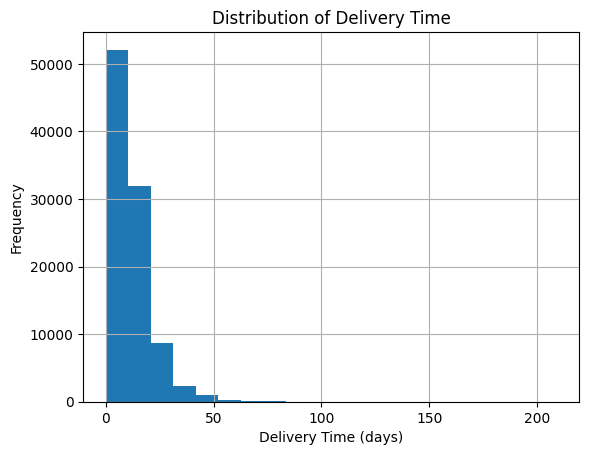

In [39]:
customers_orders_df['delivery_time'] = customers_orders_df['order_delivered_customer_date'] - customers_orders_df['order_purchase_timestamp']
customers_orders_df['delivery_time'] = customers_orders_df['delivery_time'].dt.days
customers_orders_df['delivery_time'].hist(bins=20)
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')
plt.show()

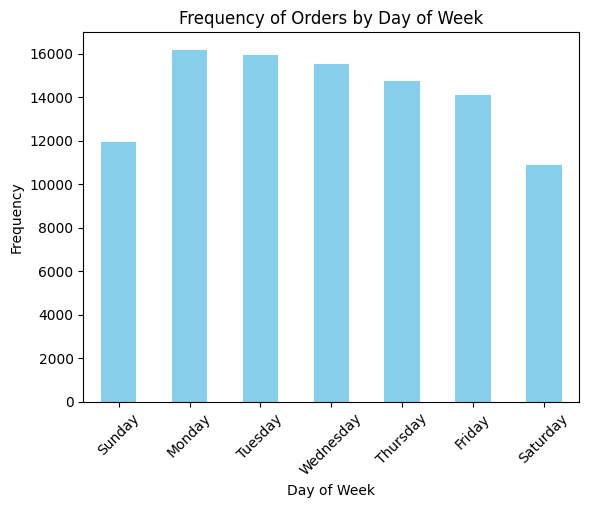

In [40]:
customers_orders_df['day_of_week'] = customers_orders_df['order_purchase_timestamp'].dt.day_name()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
customers_orders_df['day_of_week'] = pd.Categorical(customers_orders_df['day_of_week'], categories=day_order, ordered=True)
customers_orders_df['day_of_week'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Frequency of Orders by Day of Week')
plt.xticks(rotation=45)
plt.show()

In [41]:
customers_orders_df['is_late'] = customers_orders_df['order_delivered_customer_date'] > customers_orders_df['order_estimated_delivery_date']
customers_orders_df['is_late'].value_counts(normalize=True) * 100

,proportion
is_late,
False,92.129001
True,7.870999


Merge dataset order_items_df, order_reviews_df, products_df, product_category_df untuk mengetahui performa produk menjadi perform_product_df

In [61]:
# Merge order_items_df dengan order_reviews_df berdasarkan order_id
perform_product_df = order_items_df.merge(order_reviews_df, on="order_id", how="left")

# Merger order_payments_df berdasarkan order_id
perform_product_df = perform_product_df.merge(order_payment_df, on="order_id", how="left")

# Merge dengan products_df berdasarkan product_id
perform_product_df = perform_product_df.merge(products_df, on="product_id", how="left")

# Merge dengan product_category_df berdasarkan product_category_name
perform_product_df = perform_product_df.merge(product_category_df, on="product_category_name", how="left")

perform_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,...,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,NaN,...,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,...,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,NaN,...,25.78,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,NaN,...,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [63]:
perform_product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118310 non-null  object        
 1   order_item_id                  118310 non-null  int64         
 2   product_id                     118310 non-null  object        
 3   seller_id                      118310 non-null  object        
 4   shipping_limit_date            118310 non-null  datetime64[ns]
 5   price                          118310 non-null  float64       
 6   freight_value                  118310 non-null  float64       
 7   review_id                      117332 non-null  object        
 8   review_score                   117332 non-null  float64       
 9   review_comment_title           13892 non-null   object        
 10  review_comment_message         49682 non-null   object        
 11  

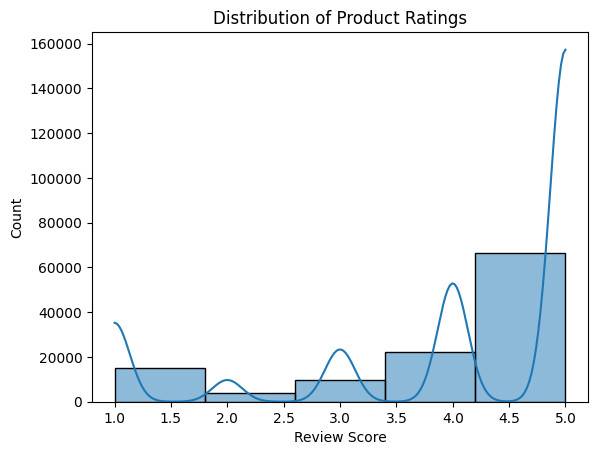

In [64]:
sns.histplot(perform_product_df["review_score"], bins=5, kde=True)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Product Ratings")
plt.show()


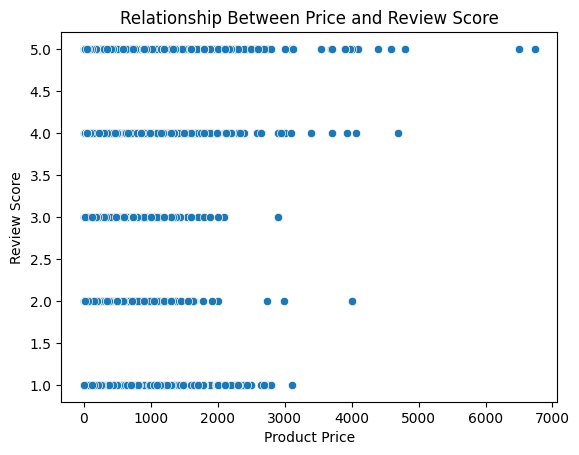

In [65]:
sns.scatterplot(data=perform_product_df, x="price", y="review_score")
plt.xlabel("Product Price")
plt.ylabel("Review Score")
plt.title("Relationship Between Price and Review Score")
plt.show()

Merge customers_orders_df dan perform_product_df menjadi customers_df

In [72]:
customers_df = pd.merge(customers_orders_df, perform_product_df, how='left', on='order_id')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [73]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119084 entries, 0 to 119083
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119084 non-null  object        
 1   customer_unique_id             119084 non-null  object        
 2   customer_zip_code_prefix       119084 non-null  int64         
 3   customer_city                  119084 non-null  object        
 4   customer_state                 119084 non-null  object        
 5   order_id                       118924 non-null  object        
 6   order_status                   118924 non-null  object        
 7   order_purchase_timestamp       118924 non-null  datetime64[ns]
 8   order_approved_at              118924 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117042 non-null  datetime64[ns]
 10  order_delivered_customer_date  115707 non-null  datetime64[ns]
 11  

In [74]:
customers_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19600         11.62   7274.88
credit_card     75991          0.01  13664.08
debit_card       1521         13.38   4445.50
voucher          3766          0.00   1839.05

In [81]:
customers_df.groupby(by="seller_id").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id   price        
                                  nunique     min     max
seller_id                                                
0015a82c2db000af6aaaf3ae2ecb0532        3  895.00  895.00
001cca7ae9ae17fb1caed9dfb1094831      200   69.90  199.00
001e6ad469a905060d959994f1b41e4f        1  250.00  250.00
002100f778ceb8431b7a1020ff7ab48f       51    9.90  129.90
003554e2dce176b5555353e4f3555ac8        1  120.00  120.00
...                                   ...     ...     ...
ffcfefa19b08742c5d315f2791395ee5        1   69.90   69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3       18   13.00  214.00
ffeee66ac5d5a62fe688b9d26f83f534       14   89.99  149.99
fffd5413c0700ac820c7069d66d98c89       60   39.80  636.00
ffff564a4f9085cd26170f4732393726       20   11.50  366.50

[3095 rows x 3 columns]

In [82]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165588 entries, 0 to 165587
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    165588 non-null  object        
 1   customer_unique_id             165588 non-null  object        
 2   customer_zip_code_prefix       165588 non-null  int64         
 3   customer_city                  165588 non-null  object        
 4   customer_state                 165588 non-null  object        
 5   order_id                       165428 non-null  object        
 6   order_status                   165428 non-null  object        
 7   order_purchase_timestamp       165428 non-null  datetime64[ns]
 8   order_approved_at              165428 non-null  datetime64[ns]
 9   order_delivered_carrier_date   162866 non-null  datetime64[ns]
 10  order_delivered_customer_date  161313 non-null  datetime64[ns]
 11  

**Insight:**
- Hanya ada 7% product yang mengalami keterlambatan
- Kebanyakan product membutuhkan waktu 10 hari untuk sampai ke pelanggan
- Tidak ada hubungan yang pasti terkait harga dan review products

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi customer yang kita miliki?

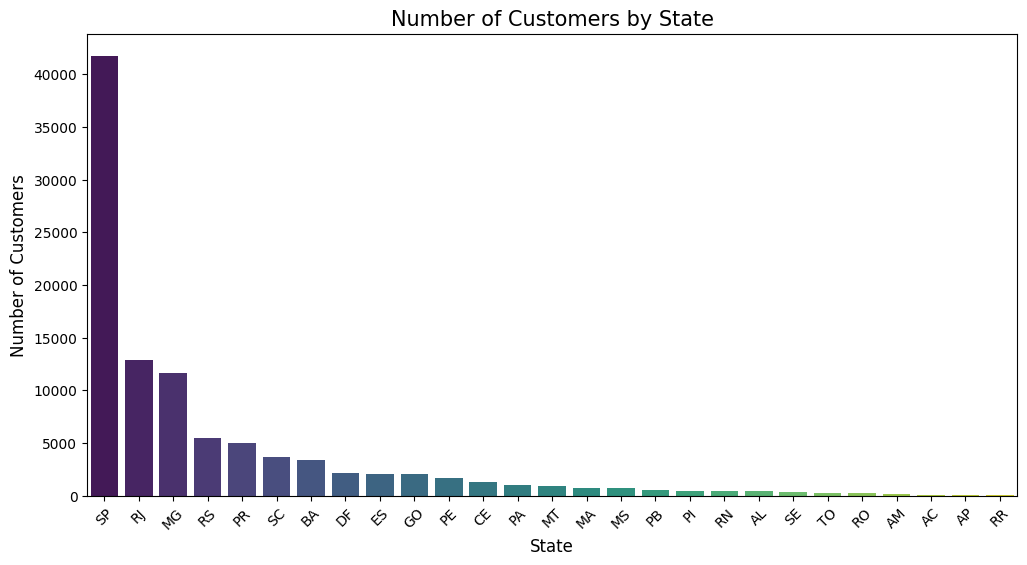

In [83]:
by_state = all_df.groupby(by="customer_state")["customer_id"].nunique().reset_index()
by_state.rename(columns={"customer_id": "customer_count"}, inplace=True)

by_state = by_state.sort_values(by="customer_count", ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(
    x="customer_state",
    y="customer_count",
    hue="customer_state",
    dodge=False,
    data=by_state,
    palette="viridis",
    legend=False
)
plt.title("Number of Customers by State", fontsize=15)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlabel("State", fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2: Apa saja produk yang paling laris dan tidak?

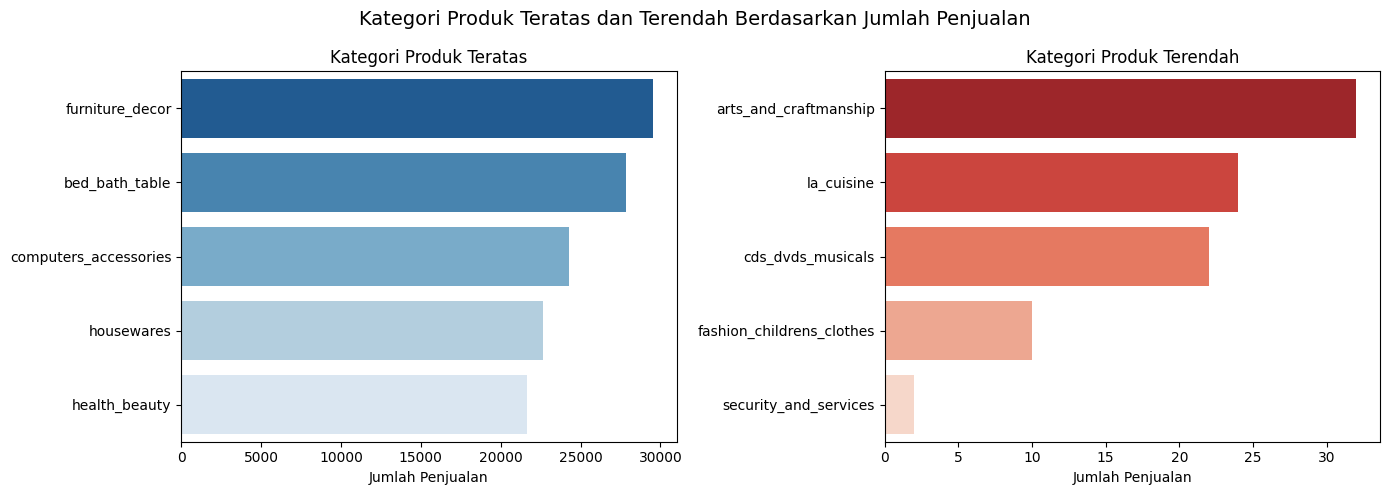

In [84]:
product_sales = all_df.groupby('product_category_name_english')['order_item_id'].sum().reset_index()

product_sales = product_sales.sort_values(by='order_item_id', ascending=False)

top_products = product_sales.head(5)
bottom_products = product_sales.tail(5)

fig, axes = plt.subplots(ncols=2, figsize=(14, 5))


sns.barplot(y=top_products['product_category_name_english'],
            x=top_products['order_item_id'],
            ax=axes[0],
            hue=top_products['product_category_name_english'],
            palette='Blues_r',
            legend=False)
axes[0].set_title('Kategori Produk Teratas')
axes[0].set_xlabel('Jumlah Penjualan')
axes[0].set_ylabel('')

sns.barplot(y=bottom_products['product_category_name_english'],
            x=bottom_products['order_item_id'],
            ax=axes[1],
            hue=bottom_products['product_category_name_english'],
            palette='Reds_r',
            legend=False)
axes[1].set_title('Kategori Produk Terendah')
axes[1].set_xlabel('Jumlah Penjualan')
axes[1].set_ylabel('')

fig.suptitle('Kategori Produk Teratas dan Terendah Berdasarkan Jumlah Penjualan', fontsize=14)

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana performa penjualan dan revenue pada tiap bulannya?

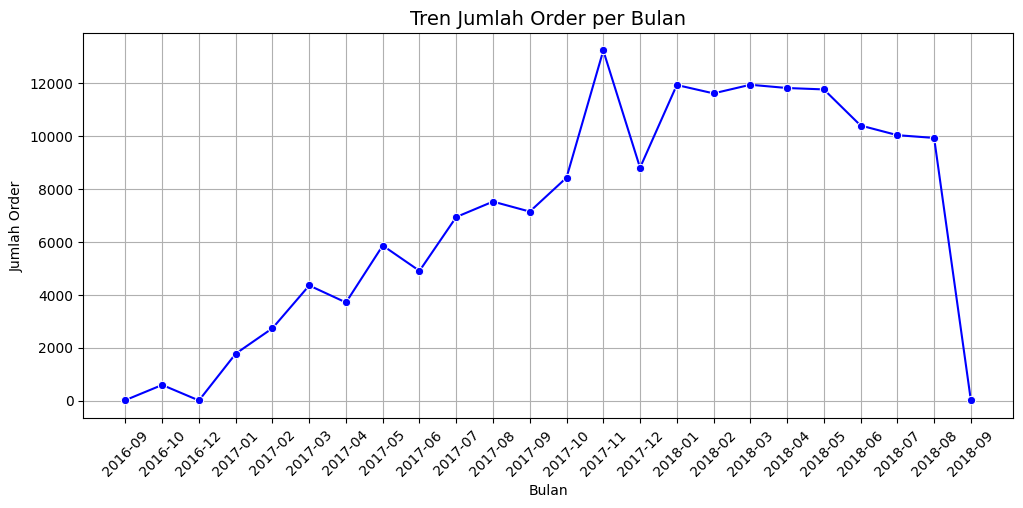

In [89]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])
all_df['order_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = all_df.groupby('order_month')['order_id'].count().reset_index()
monthly_orders['order_month'] = monthly_orders['order_month'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_orders['order_month'],
             y=monthly_orders['order_id'],
             marker='o', color='blue')

plt.title('Tren Jumlah Order per Bulan', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Pertanyaan 4: Kategori produk mana yang paling laris dan menguntungkan?

In [120]:
all_df['revenue'] = all_df['price'] * all_df['order_item_id']
product_revenue = all_df.groupby('product_category_name_english')['revenue'].sum().reset_index()
total_revenue = product_revenue['revenue'].sum()
product_revenue['contribution (%)'] = (product_revenue['revenue'] / total_revenue) * 100
product_revenue = product_revenue.sort_values(by='revenue', ascending=False)
top_products = product_revenue.head(10)

print(top_products)

   product_category_name_english     revenue  contribution (%)
15         computers_accessories  2641513.52         10.185390
7                 bed_bath_table  2232421.11          8.607974
39               furniture_decor  2034525.21          7.844909
43                 health_beauty  1813105.39          6.991138
70                 watches_gifts  1597249.04          6.158819
65                sports_leisure  1505438.75          5.804809
49                    housewares  1452929.27          5.602338
5                           auto  1309570.63          5.049562
42                  garden_tools  1224353.30          4.720974
57              office_furniture  1160685.71          4.475478


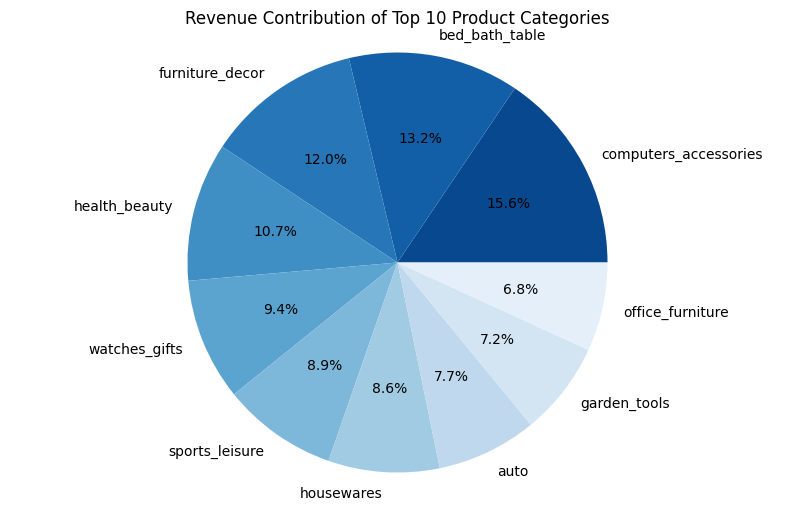

In [121]:
plt.figure(figsize=(10, 6))
plt.pie(top_products['contribution (%)'], labels=top_products['product_category_name_english'], autopct='%1.1f%%', colors=sns.color_palette('Blues_r', len(top_products)))
plt.title('Revenue Contribution of Top 10 Product Categories')
plt.axis('equal')
plt.show()

### Pertanyaan 5: Jenis pembayaran apa yang paling sering digunakan?

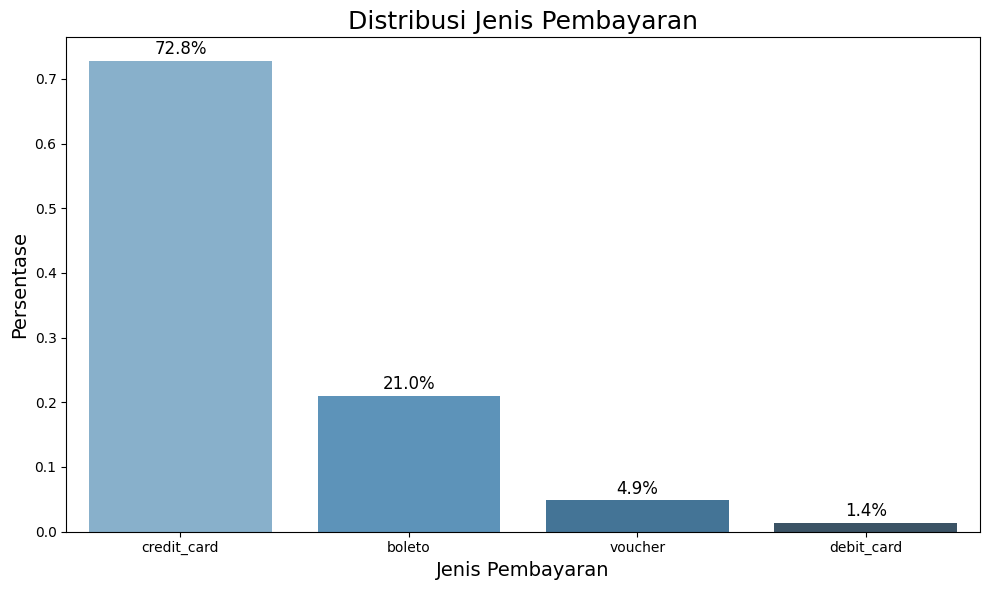

In [92]:
payment_counts = all_df['payment_type'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=payment_counts.index,
    y=payment_counts.values,
    hue=payment_counts.index,
    palette="Blues_d",
    legend=False
)

plt.title("Distribusi Jenis Pembayaran", fontsize=18)
plt.xlabel("Jenis Pembayaran", fontsize=14)
plt.ylabel("Persentase", fontsize=14)

for i, v in enumerate(payment_counts.values):
    plt.text(i, v + 0.01, f'{v*100:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


### Pertanyaan 6: Bagaimana peta persebaran customer?

In [122]:
other_state_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count'] >= 2].shape
max_state = (geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_state'])
             .size()
             .reset_index(name='count')
             .drop_duplicates(subset='geolocation_zip_code_prefix')
             .drop('count', axis=1))


In [124]:
geolocation_silver = geolocation_df.groupby(
    ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
)[['geolocation_lat', 'geolocation_lng']].median().reset_index()

geolocation_silver = geolocation_silver.merge(
    max_state,
    on=['geolocation_zip_code_prefix', 'geolocation_state'],
    how='inner'
)

In [135]:
def brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(
    kind="scatter", x="geolocation_lng", y="geolocation_lat",
    figsize=(10,10), alpha=0.3, s=0.3, c='blue'
    )
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

In [127]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [129]:
customers_silver.to_csv("geolocation.csv", index=False)

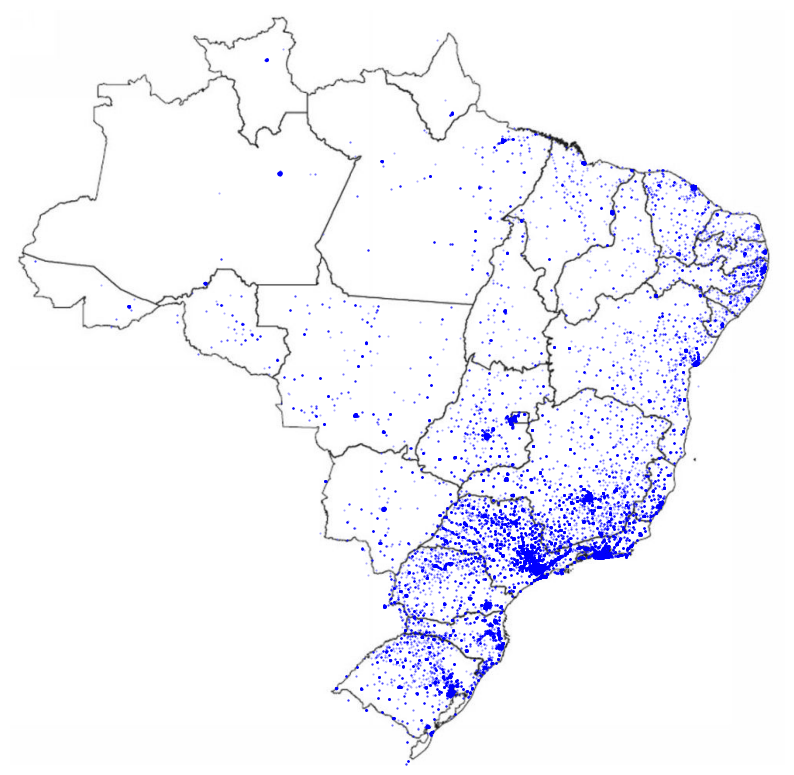

In [136]:
brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

**Insight:**
- health_beauty merupakan produk yang paling laris dan menguntungkan
- Terlihat ada peningkatan jumlah order sejak awal periode hingga mencapai puncaknya. Meskipun jumlah order meningkat, revenue juga ikut naik, yang berarti tidak ada indikasi penurunan harga secara signifikan. Puncak revenue bisa digunakan sebagai referensi untuk strategi pemasaran di bulan-bulan tertentu.
- Metode pembayaran yang paling sering digunakan adalah credit card. Hal ini bisa membantu dalam menawarkan promosi khusus, misalnya diskon untuk metode pembayaran yang kurang populer.

## Analisis Lanjutan (Opsional)

In [94]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

reference_date = all_df['order_purchase_timestamp'].max()

rfm = all_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,292.0,1,114.74
000161a058600d5901f007fab4c27140,413.0,1,67.41
0001fd6190edaaf884bcaf3d49edf079,551.0,1,195.42
0002414f95344307404f0ace7a26f1d5,382.0,1,179.35
000379cdec625522490c315e70c7a9fb,153.0,1,107.01


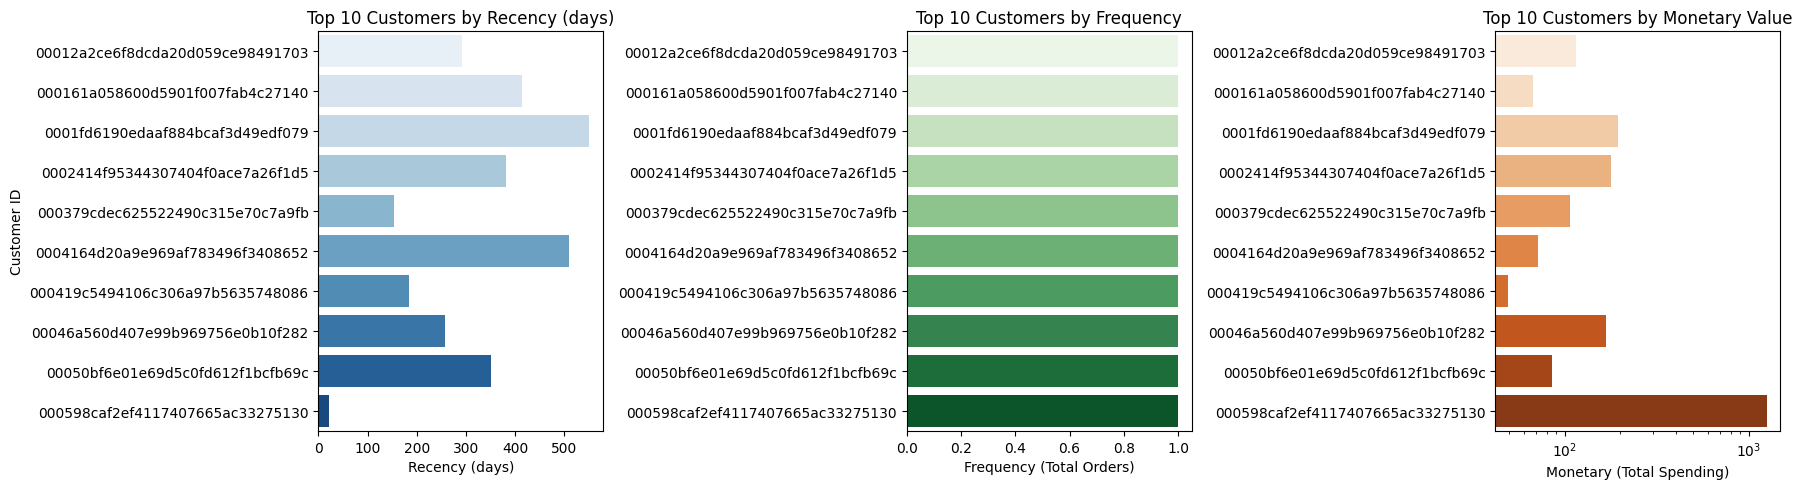

In [138]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot untuk Recency
sns.barplot(y=rfm.index[:10], x=rfm['Recency'][:10], hue=rfm.index[:10], palette='Blues', legend=False, ax=axes[0])
axes[0].set_title('Top 10 Customers by Recency (days)')
axes[0].set_xlabel('Recency (days)')
axes[0].set_ylabel('Customer ID')

# Plot untuk Frequency
sns.barplot(y=rfm.index[:10], x=rfm['Frequency'][:10], hue=rfm.index[:10], palette='Greens', legend=False, ax=axes[1])
axes[1].set_title('Top 10 Customers by Frequency')
axes[1].set_xlabel('Frequency (Total Orders)')
axes[1].set_ylabel('')

# Plot untuk Monetary
sns.barplot(y=rfm.index[:10], x=rfm['Monetary'][:10], hue=rfm.index[:10], palette='Oranges', legend=False, ax=axes[2])
axes[2].set_title('Top 10 Customers by Monetary Value')
axes[2].set_xlabel('Monetary (Total Spending)')
axes[2].set_ylabel('')
axes[2].set_xscale("log")

plt.tight_layout()
plt.show()


## Conclusion

1. Bagaimana demografi customer yang kita miliki?

  > State (Negara Bagian) dengan customer terbanyak terletak di SP (Sao Paulo), dengan disusul oleh RJ (Rio de Janeiro)

2. Apa saja produk yang paling laris dan tidak?
  > bed_bath_table, furniture_decor, health_beauty adalah kategori yang paling banyak terjual. Artinya, produk-produk kebutuhan rumah tangga dan kecantikan memiliki permintaan yang tinggi. Hal ini bisa menjadi fokus untuk strategi pemasaran dan persediaan stok. Sementara, arts_and_craftmanship, la_cuisine, cds_dvds_musicals memiliki jumlah penjualan yang paling rendah. Hal ini bisa disebabkan oleh perubahan tren atau kurangnya promosi pada kategori ini.

3. Bagaimana performa penjualan pada tiap bulannya?
  > Tren jumlah order secara umum mengalami peningkatan dari 2016 hingga pertengahan 2018. Order meningkat signifikan mulai awal 2017. Jumlah order mencapai titik tertinggi sekitar Oktober 2017, tetapi terjadi penurunan tajam setelahnya di November 2017. Setelah turun, jumlah order kembali naik dan relatif stabil di tahun 2018 sebelum mulai menurun kembali.

4. Kategori produk mana yang paling menguntungkan?
  > computers_accessories menjadi kategori produk yang paling menguntungkan, dengan menyumbang 15% pendapatan

5. Jenis pembayaran apa yang paling sering digunakan?
  > Para customer lebih sering menggunakan metode pembayaran dengan credit card. Untuk meningkatkan penggunaan metode pembayaran lain, dapat ditambahkan promosi menarik seperti potongan harga dengan metode pembayaran tertentu.
6. Bagaimana peta persebaran customer?
  > Berdasarkan peta persebaran customer, rata-rata customer tinggal di bagian tenggara dan selatan. Selain itu, customer juga banyak tersebar di kota-kota yang merupakan ibu kota, seperti São Paulo, Rio de Janeiro, Porto Alegre, dan lainnya.

In [137]:
all_df.to_csv("/content/drive/MyDrive/Data/ecommerce/all_df.csv", index=False)